In [1]:
import matplotlib.pyplot as plt

import torch
from torchvision import models
from torchvision.models.feature_extraction import create_feature_extractor
from torchvision.io import read_image

In [2]:
import sys
sys.path.append("..")
from model import Discriminator
from config import Config
from loss import DiscriminatorFeaturesLoss

In [3]:
# im_path = "/work3/s204163/data/Set14/GTmod12/baboon.png"
im_path = "/work3/s204163/data/Set5/GTmod12/butterfly.png"
im = read_image(im_path).float().unsqueeze(0) / 255.0

# VGG19

In [69]:
vgg = models.vgg19(weights=models.VGG19_Weights.IMAGENET1K_V1)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [109]:
extraction_layers = {
    "features.17" : 1/8,
    "features.26" : 1/4,
    "features.35" : 1/2
}
feature_extractor = create_feature_extractor(vgg, list(extraction_layers))

# Freeze model parameters.
for model_parameters in feature_extractor.parameters():
    model_parameters.requires_grad = False

# Set to validation mode
feature_extractor = feature_extractor.eval()

features.17


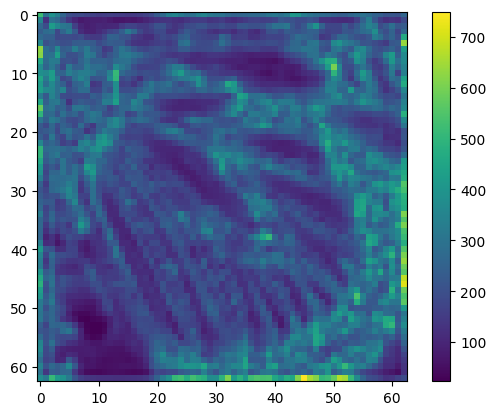

features.26


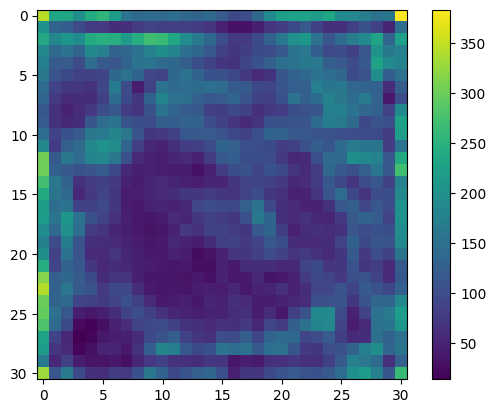

features.35


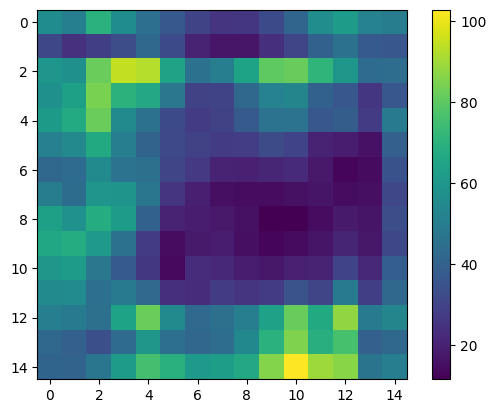

In [110]:
activations = feature_extractor(im)

for name, act in activations.items():
    print(name)
    plt.imshow(act.squeeze().sum(axis=0).numpy())
    plt.colorbar()
    plt.show()

# Discriminator

In [72]:
c = Config()
d = Discriminator(c)
weights = torch.load("/zhome/c9/c/156514/SRGAN-ST/results/discriminator-lorna-pretrained.pth")
d.load_state_dict(weights)
print(d)

Discriminator(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.

In [107]:
extraction_layers = {
    "features.4" : 1/2,
    "features.10" : 1/2,
}

feature_extractor = create_feature_extractor(d, list(extraction_layers))

# Freeze model parameters.
for model_parameters in feature_extractor.parameters():
    model_parameters.requires_grad = False

# Set to validation mode
feature_extractor = feature_extractor.eval()

features.4


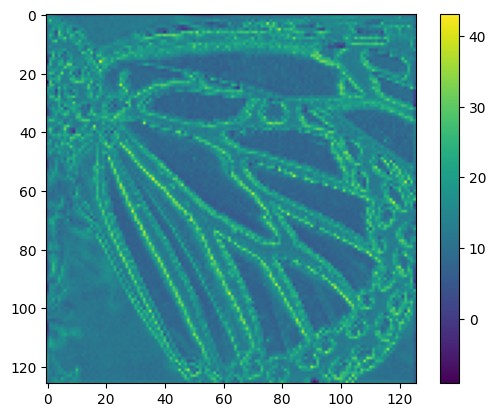

features.7


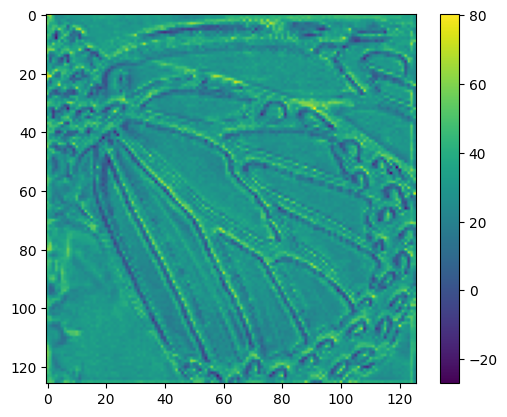

features.10


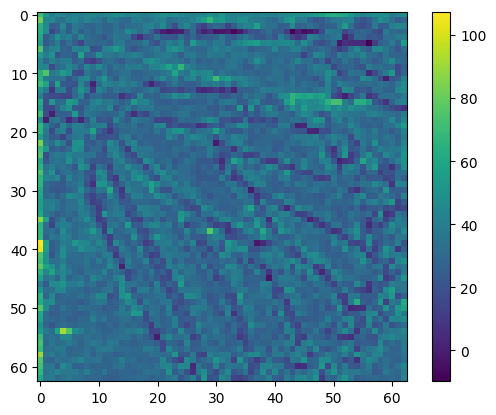

features.13


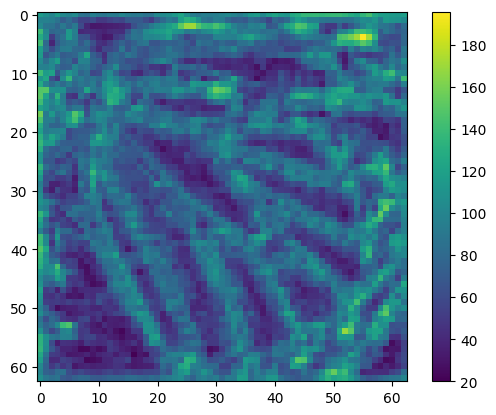

In [108]:
activations = feature_extractor(im)

for name, act in activations.items():
    print(name)
    plt.imshow(act.squeeze().sum(axis=0).numpy())
    plt.colorbar()
    plt.show()

In [4]:
extraction_layers = {
    "features.4" : 1/2,
    "features.10" : 1/2,
}
c = Config()
d = DiscriminatorFeaturesLoss(extraction_layers=extraction_layers, config=c)

In [14]:
d(im, 0.4*im)

tensor(0.0197)